In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Random sensor placement

In [3]:
import numpy as np
import random

def latin_hypercube_sampling(n, k):
    """
    Generate Latin Hypercube Sampling points.

    Parameters:
    - n: Number of samples (rows).
    - k: Number of variables (columns).

    Returns:
    - A numpy array of shape (n, k) containing the LHS points.
    """

    # Generate random permutations for each variable
    samples = np.zeros((n, k))
    for j in range(k):
        # Divide the interval [0, 1] into n equal intervals
        seg_size = 1.0 / n
        seg_starts = np.arange(0, 1, seg_size)
        
        # Randomly shuffle the starting points
        random.shuffle(seg_starts)
        
        # Fill each row with one of the random segments
        for i in range(n):
            samples[i, j] = random.uniform(seg_starts[i], seg_starts[i] + seg_size)

    return samples

def generate_sensor_pos(lhs_sample, domain_dim):
    rescaled_sample = np.copy(lhs_sample)
    # Convert columns to np.int32 after scaling
    rescaled_sample[:, 0] = (rescaled_sample[:, 0] * domain_dim[0])
    rescaled_sample[:, 1] = (rescaled_sample[:, 1] * domain_dim[1]) + 80
    return rescaled_sample

## Sensor measurement creation loop

In [75]:
Re_list = [300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
no_of_sensor_list = [64]
for n in no_of_sensor_list:
    # Create random sensor position
    k = 2   # Number of variables
    file_name_loc = "sensor_loc_" + str(n) + ".npy"
    rescaled_sample = np.load(file_name_loc)
    for Re in Re_list:
        file_name = "D:/data/Navier-Stokes/Navier-Stokes/Re_" + str(Re) + ".npy"
        field_data = np.load(file_name)
        sensor_measurement = np.zeros(shape=(n,39))
        for i in range(n):
            for j in range(39):
                sensor_measurement[i,j] = np.sqrt(field_data[int(rescaled_sample[i,0]),int(rescaled_sample[i,1]),j*3]**2 + 
                                                  field_data[int(rescaled_sample[i,0]),int(rescaled_sample[i,1]),j*3+1]**2) 
            # plt.plot(sensor_measurement[i,:])
            # plt.show()
        # print(sensor_measurement)
        file_name_data = "sensor_data_" + str(n) + "_" + str(Re) +".npy"
        np.save(file_name_data,sensor_measurement)


### Sensor location generation

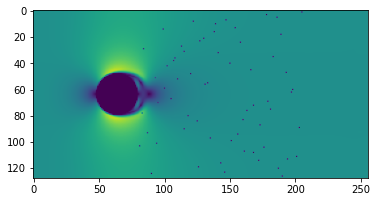

In [73]:
import numpy as np

# Generate random sample data
# Example usage:
Re = 750
file_name = "D:/data/Navier-Stokes/Navier-Stokes/Re_" + str(Re) + ".npy"
field_data = np.load(file_name)
n = 64  # Number of samples
k = 2   # Number of variables
sample = latin_hypercube_sampling(n, k)
rescaled_sample = generate_sensor_pos(sample, (128,126)) # Rescaling to 128 x 256

plot_field_data = np.copy(field_data)
# Loop to set specific elements of field_data to 0
for j in range(38):
    for i in range(n):
        plot_field_data[int(rescaled_sample[i, 0]), int(rescaled_sample[i,1]), j*3] = 0
        
plt.imshow(np.sqrt(plot_field_data[:,:,0]**2 + field_data[:,:,1]**2 ), vmin = 0, vmax = 2)
plt.show()
np.save('sensor_loc_64.npy', rescaled_sample)

# Sensor placement around obstacle

## Sensor location creation

In [46]:
import numpy as np

def generate_sensor_pos(lhs_sample, domain_dim):
    rescaled_sample = np.copy(lhs_sample)
    # Convert columns to np.int32 after scaling
    rescaled_sample[:, 0] = (rescaled_sample[:, 0] * domain_dim)
    return rescaled_sample

# Generate random sample data
# Example usage:
# Re = 750
# file_name = "D:/data/Navier-Stokes/Navier-Stokes/Re_" + str(Re) + ".npy"
# field_data = np.load(file_name)
n = 32  # Number of samples
k = 1   # Number of variables
sample = latin_hypercube_sampling(n, k)
rescaled_sample = generate_sensor_pos(sample, 360) # Rescaling to 128 x 256
print(rescaled_sample)
pos = np.zeros(shape = (n,2))
pos[:,0:1] = np.cos(np.deg2rad(rescaled_sample))*21+64
pos[:,1:2] = np.sin(np.deg2rad(rescaled_sample))*21+66
# plot_field_data = np.copy(field_data)
# # # Loop to set specific elements of field_data to 0
# for j in range(38):
#     for i in range(n):
#         plot_field_data[int(pos[i, 0]), int(pos[i,1]), j*3] = 0
        
# plt.imshow(np.sqrt(plot_field_data[:,:,0]**2 + field_data[:,:,1]**2 ), vmin = 0, vmax = 2)
# plt.show()
# print(pos)

[[107.47436179]
 [ 11.90847674]
 [ 25.79613148]
 [333.00005883]
 [288.15333718]
 [ 89.88632513]
 [121.44857459]
 [ 34.66898884]
 [201.07878725]
 [266.20684845]
 [355.21217057]
 [243.44876913]
 [ 72.03693787]
 [321.91211749]
 [255.70201603]
 [162.49970588]
 [ 91.82771358]
 [ 61.02285572]
 [338.6720798 ]
 [177.13199343]
 [130.49177134]
 [279.31489407]
 [157.18166515]
 [189.28457465]
 [235.491051  ]
 [144.81106144]
 [219.85957925]
 [313.11834749]
 [295.46518472]
 [ 45.12879555]
 [206.16723986]
 [  8.54946936]]


In [47]:
np.save('sensor_loc_cir_32.npy',pos)

## Sensor measurement creation loop

In [51]:
Re_list = [300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
no_of_sensor_list = [8,16,32,64]
for n in no_of_sensor_list:
    # Create random sensor position
    k = 2   # Number of variables
    file_name_loc = "sensor_loc_cir_" + str(n) + ".npy"
    rescaled_sample = np.load(file_name_loc)
    for Re in Re_list:
        file_name = "D:/data/Navier-Stokes/Navier-Stokes/Re_" + str(Re) + ".npy"
        field_data = np.load(file_name)
        sensor_measurement = np.zeros(shape=(n,39))
        for i in range(n):
            for j in range(39):
                sensor_measurement[i,j] = np.sqrt(field_data[int(rescaled_sample[i,0]),int(rescaled_sample[i,1]),j*3]**2 + 
                                                  field_data[int(rescaled_sample[i,0]),int(rescaled_sample[i,1]),j*3+1]**2) 
            plt.plot(sensor_measurement[i,:])
            # plt.show()
        # print(sensor_measurement)
        file_name_data = "sensor_data_cir_" + str(n) + "_" + str(Re) +".npy"
        np.save(file_name_data,sensor_measurement)


FileNotFoundError: [Errno 2] No such file or directory: 'sensor_loc_cir_8.npy'

# Sensor at boundary

## Sensor position creation

(32, 2)
(128, 256, 39)


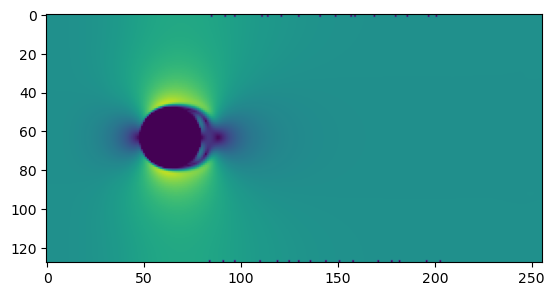

[[  1.         186.56565311]
 [  1.         114.21354761]
 [  1.         149.05245142]
 [  1.         159.82043253]
 [  1.         121.64368032]
 [  1.         180.39869315]
 [  1.         201.95555928]
 [  1.          85.52286418]
 [  1.         157.56066793]
 [  1.         141.35348074]
 [  1.         111.39983925]
 [  1.          92.25454456]
 [  1.         130.61881831]
 [  1.         197.71532575]
 [  1.          97.77466772]
 [  1.         169.38975643]
 [127.          84.46568761]
 [127.         125.04468258]
 [127.         130.65323231]
 [127.         178.16032903]
 [127.         182.64349854]
 [127.         110.37896045]
 [127.         203.43523711]
 [127.         158.91294377]
 [127.         144.86819162]
 [127.         151.25567131]
 [127.         196.61482766]
 [127.         119.1938483 ]
 [127.         171.18765646]
 [127.         136.38070319]
 [127.          97.14259691]
 [127.          91.47587968]]


In [53]:
import numpy as np

def generate_sensor_pos(lhs_sample, domain_dim):
    rescaled_sample = np.copy(lhs_sample)
    # Convert columns to np.int32 after scaling
    rescaled_sample[:, 0] = (rescaled_sample[:, 0] * domain_dim)
    return rescaled_sample

# Generate random sample data
# Example usage:
Re = 750
file_name = "E:/Research/Data/flow_field_recon/full_field_data/full_field_data_" + str(Re) + ".npy"
field_data = np.load(file_name)
n = 32  # Number of samples
k = 1   # Number of variables
sample_up = latin_hypercube_sampling(int(n/2), k)
rescaled_sample_up = generate_sensor_pos(sample_up, 126) # Rescaling to 128 x 256

sample_down = latin_hypercube_sampling(int(n/2), k)
rescaled_sample_down = generate_sensor_pos(sample_down, 126) # Rescaling to 128 x 256
# print(rescaled_sample_up)
pos_up = np.zeros(shape = (int(n/2),2))
# print(pos_up.shape)
pos_up[:,0:1] = 1
pos_up[:,1:2] = rescaled_sample_up[:] + 80

pos_down = np.zeros(shape = (int(n/2),2))
pos_down[:,0:1] = 127
pos_down[:,1:2] = rescaled_sample_down[:] + 80

pos = np.concatenate([pos_up,pos_down], axis = 0)
print(pos.shape)
plot_field_data = np.copy(field_data)
print(plot_field_data.shape)
# Loop to set specific elements of field_data to 0
for j in range(39):
    for i in range(n):
        # print(pos[i,0], pos[i,1])
        plot_field_data[int(pos[i, 0]), int(pos[i,1]), j] = 0
        
plt.imshow(plot_field_data[:,:,0], vmin = 0, vmax = 2)
plt.show()
print(pos)
np.save('sens_pos_32_edge',pos)

In [56]:
Re_list = [300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
no_of_sensor_list = [32]
for n in no_of_sensor_list:
    # Create random sensor position
    k = 2   # Number of variables
    file_name_loc = "sens_pos_" + str(n) + "_edge.npy"
    rescaled_sample = np.load(file_name_loc)
    # print(rescaled_sample)
    for Re in Re_list:
        file_name = "E:/Research/Data/flow_field_recon/full_field_data/full_field_data_" + str(Re) + ".npy"
        field_data = np.load(file_name)
        sensor_measurement = np.zeros(shape=(n,39))
        for i in range(n):
            # print(int(rescaled_sample[i,0]),int(rescaled_sample[i,1]))
            for j in range(39):
                sensor_measurement[i,j] = field_data[int(rescaled_sample[i,0]),int(rescaled_sample[i,1]),j]
            # plt.plot(sensor_measurement[i,:])
            # plt.show()
        # print(sensor_measurement)
        file_name_data = "sensor_data_edge_" + str(n) + "_" + str(Re) +".npy"
        np.save(file_name_data,sensor_measurement)


# Full field data creation

In [120]:
Re_list = [300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
n_time_step = 39
domain_dim = (128,256)
for Re in Re_list:
    file_name = "D:/data/Navier-Stokes/Navier-Stokes/Re_" + str(Re) + ".npy"
    field_data = np.load(file_name)
    full_field_data = np.zeros(shape = (domain_dim[0],domain_dim[1],n_time_step))
    for j in range(n_time_step):
        full_field_data[:,:,j] = np.sqrt(field_data[:,:,j*3]**2 + 
                                                field_data[:,:,j*3+1]**2) 
        # plt.imshow(full_field_data[:,:,j])
        # plt.show()
    # print(sensor_measurement)
    file_name_data = "full_field_data_" + str(Re) +".npy"
    np.save(file_name_data,full_field_data)
